# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [514]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [515]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [516]:
df_list = {'TESLA Search Trend vs Price': df_tesla, 
           'Bitcoin Search Trend': df_btc_search, 
           'Daily Bitcoin Price': df_btc_price, 
           'UE Benefits Search vs UE Rate 2004-19': df_unemployment}

for key, value in df_list.items():
    print(f"The shape of {key} is {value.shape}.")
    print(f'Number of rows = {value.shape[0]}')
    print(f'Number of column = {value.shape[1]}')
    print(value.columns)
    print('---------------')

The shape of TESLA Search Trend vs Price is (124, 3).
Number of rows = 124
Number of column = 3
Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')
---------------
The shape of Bitcoin Search Trend is (73, 2).
Number of rows = 73
Number of column = 2
Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')
---------------
The shape of Daily Bitcoin Price is (2204, 3).
Number of rows = 2204
Number of column = 3
Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')
---------------
The shape of UE Benefits Search vs UE Rate 2004-19 is (181, 3).
Number of rows = 181
Number of column = 3
Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')
---------------


In [517]:
for key, value in df_list.items():
    print(value.head())

        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368
     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5
         DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0
     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25     5.8
3  2004-04                      29     5.6
4  2004-05                      23     5.6


In [518]:
df_list_web_search = {'TESLA Search Trend vs Price': 'Tesla in Web Search', 
                      'Bitcoin Search Trend': 'BTC News Search', 
                      'UE Benefits Search vs UE Rate 2004-19': 'Unemployment Benefits in Web Search'}

for key, value in df_list.items():
    if key != 'Daily Bitcoin Price':
        print(f'Largest value for {df_list_web_search[key]}: {df_list[key].iloc[:, 1].max()}')
        print(f'Smallest value for {df_list_web_search[key]}: {df_list[key].iloc[:, 1].min()}')
        print('\n')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


Largest value for BTC News Search: 100
Smallest value for BTC News Search: 3


Largest value for Unemployment Benefits in Web Search: 100
Smallest value for Unemployment Benefits in Web Search: 14




In [519]:
for key, value in df_list.items():
    print(value.describe(), '\n')

       TSLA_WEB_SEARCH  TSLA_USD_CLOSE
count       124.000000      124.000000
mean          8.725806       50.962145
std           5.870332       65.908389
min           2.000000        3.896000
25%           3.750000        7.352500
50%           8.000000       44.653000
75%          12.000000       58.991999
max          31.000000      498.320007 

       BTC_NEWS_SEARCH
count        73.000000
mean         15.013699
std          15.146959
min           3.000000
25%           5.000000
50%          14.000000
75%          18.000000
max         100.000000 

              CLOSE        VOLUME
count   2203.000000  2.203000e+03
mean    4429.421245  8.043622e+09
std     4148.150071  1.176529e+10
min      178.102997  5.914570e+06
25%      433.629502  6.029915e+07
50%     3637.520020  2.018890e+09
75%     7997.372803  1.322478e+10
max    19497.400391  7.415677e+10 

       UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                35.110497    6.217680
std 

In [520]:
# What is the periodicity of the time series data (daily, weekly, monthly)?
for key, value in df_list.items():
    if key != 'Daily Bitcoin Price':
        periodicity = list(value.columns)[0]
        web_search_name = df_list_web_search[key]
        print(f'The periodicity of {web_search_name} is by {periodicity}.')

The periodicity of Tesla in Web Search is by MONTH.
The periodicity of BTC News Search is by MONTH.
The periodicity of Unemployment Benefits in Web Search is by MONTH.


In [521]:
# What does a value of 100 in the Google Trend search popularity actually mean?
print('A value of 100 is the peak popularity for the term.')

A value of 100 is the peak popularity for the term.


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [522]:
for key, value in df_list.items():
    if key != 'Daily Bitcoin Price':
        missing_value = value.isna().values.any()
        print(f'Missing values for {df_list_web_search[key]}?: {missing_value}')

Missing values for Tesla in Web Search?: False
Missing values for BTC News Search?: False
Missing values for Unemployment Benefits in Web Search?: False


In [523]:
for key, value in df_list.items():
    if key == 'Daily Bitcoin Price':
        missing_value = value.isna().values.any()
        print(f'Missing values for {key}?: {missing_value}')

Missing values for Daily Bitcoin Price?: True


In [524]:
num_na=df_btc_price.isna().values.sum()

print(f'Number of missing values: {num_na}')
df_btc_price[df_btc_price.CLOSE.isna()]

Number of missing values: 2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [525]:
df_btc_price.dropna(inplace=True)

num_na_drop=df_btc_price.isna().values.sum()
print(f'Number of missing values: {num_na_drop}')

Number of missing values: 0


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [526]:
for key, value in df_list.items():
    col_name = list(value.columns)[0]
    col_type = type(value[col_name][0]).__name__
    print(f'{key}: {col_type}')

TESLA Search Trend vs Price: str
Bitcoin Search Trend: str
Daily Bitcoin Price: str
UE Benefits Search vs UE Rate 2004-19: str


In [527]:
for key, value in df_list.items():
    col_name = list(value.columns)[0] # first_column
    value[col_name] = pd.to_datetime(value[col_name])

In [528]:
for key, value in df_list.items():
    col_name = list(value.columns)[0] # first_column
    print(key)
    print(value[col_name].head())
    print('\n')

TESLA Search Trend vs Price
0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]


Bitcoin Search Trend
0   2014-09-01
1   2014-10-01
2   2014-11-01
3   2014-12-01
4   2015-01-01
Name: MONTH, dtype: datetime64[ns]


Daily Bitcoin Price
0   2014-09-17
1   2014-09-18
2   2014-09-19
3   2014-09-20
4   2014-09-21
Name: DATE, dtype: datetime64[ns]


UE Benefits Search vs UE Rate 2004-19
0   2004-01-01
1   2004-02-01
2   2004-03-01
3   2004-04-01
4   2004-05-01
Name: MONTH, dtype: datetime64[ns]




### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [529]:
df_btc_price = df_btc_price.resample('ME', on='DATE').last()
df_btc_price.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


In [530]:
df_btc_price.shape

(73, 2)

# Data Visualisation

### Notebook Formatting & Style Helpers

In [531]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [532]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

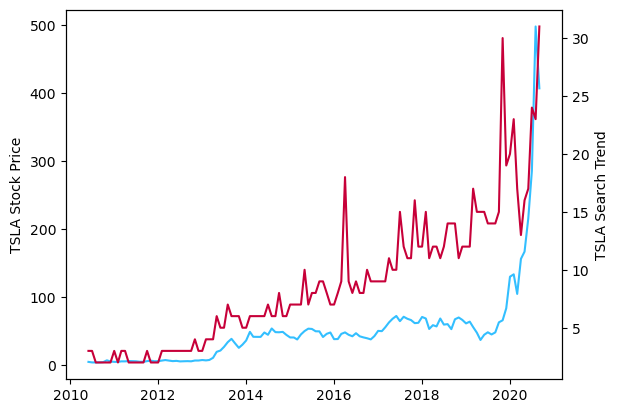

In [533]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('TSLA Search Trend')

x = df_tesla.MONTH
y_TSLA_search = df_tesla.TSLA_WEB_SEARCH
y_TSLA_volume = df_tesla.TSLA_USD_CLOSE

ax1.plot(x, y_TSLA_volume, color='#33BFFF')
ax2.plot(x, y_TSLA_search, color='#C70039')

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

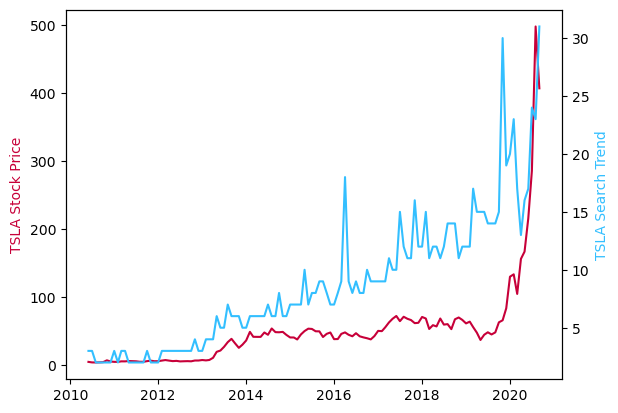

In [534]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color='#C70039')
ax2.set_ylabel('TSLA Search Trend', color='#33BFFF')

x = df_tesla.MONTH
y_TSLA_search = df_tesla.TSLA_WEB_SEARCH
y_TSLA_volume = df_tesla.TSLA_USD_CLOSE

ax1.plot(x, y_TSLA_volume, color='#C70039')
ax2.plot(x, y_TSLA_search, color='#33BFFF')

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

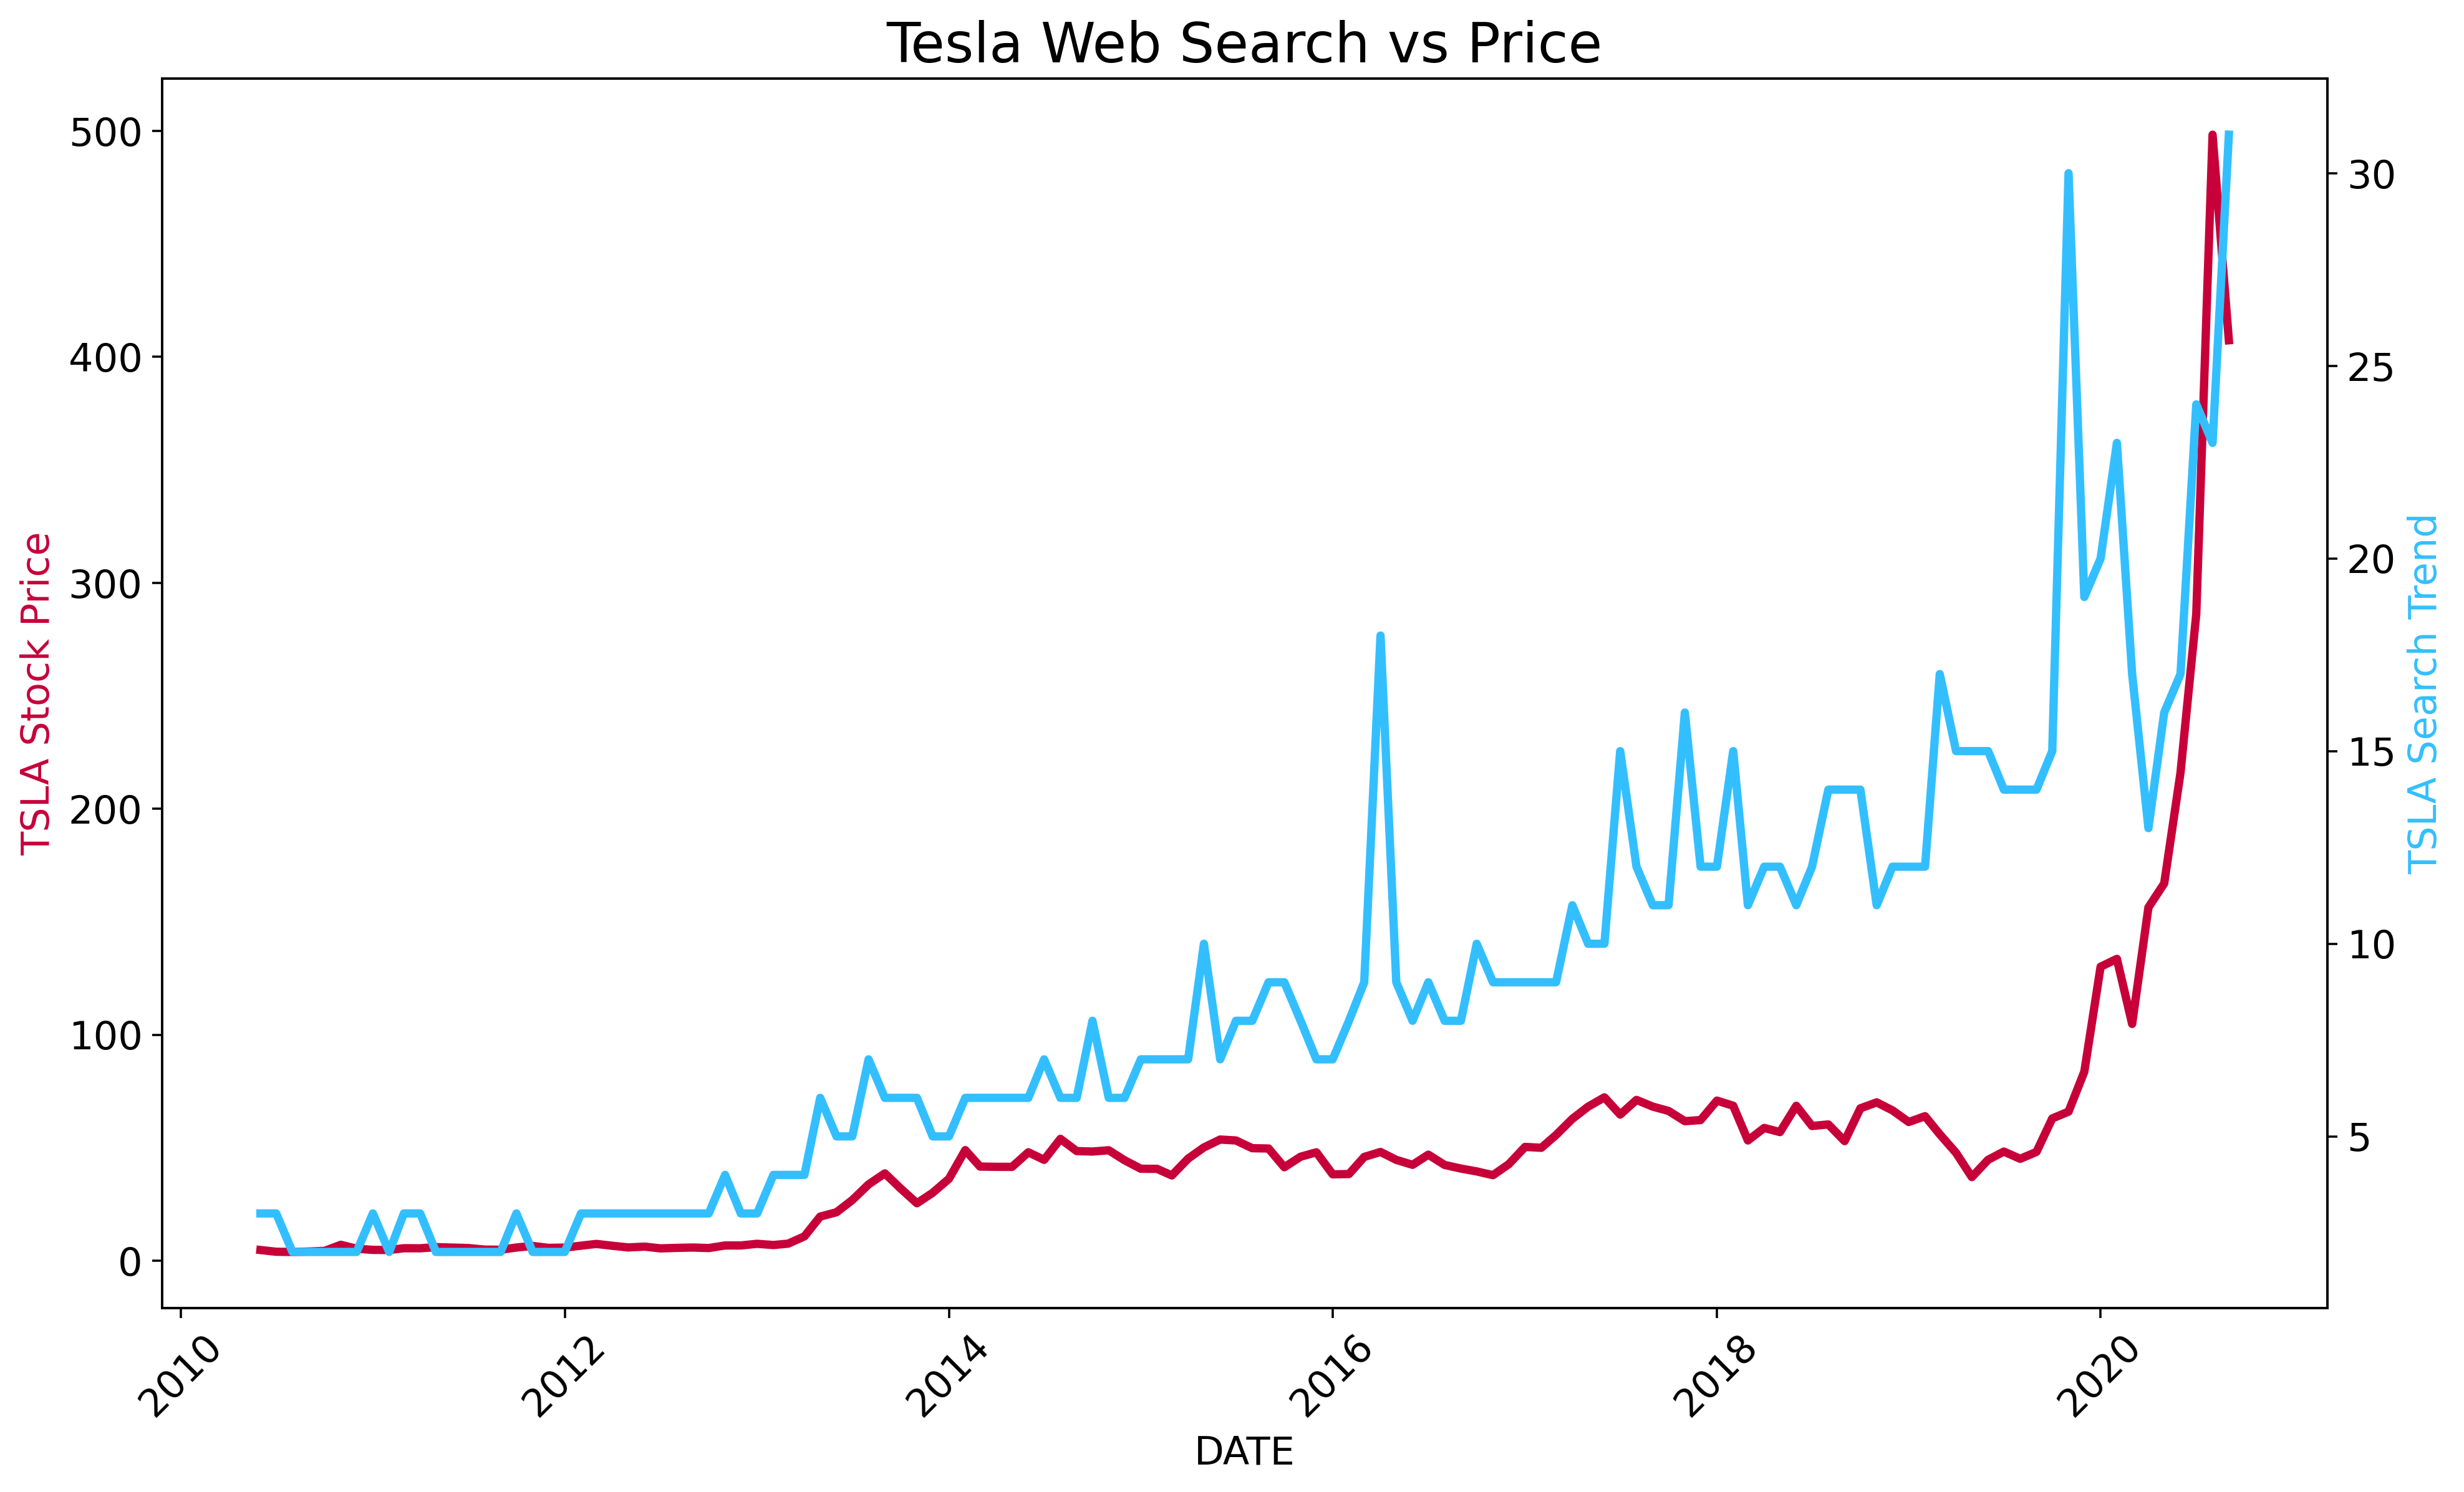

In [535]:
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=320)
ax1.set_title('Tesla Web Search vs Price', size=20)

ax1 = plt.gca()
ax2 = ax1.twinx()

# y-axes design
ax1.set_ylabel('TSLA Stock Price', color='#C70039', size=14)
ax2.set_ylabel('TSLA Search Trend', color='#33BFFF', size=14)
ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)

# x-axes design
ax1.set_xlabel('DATE', size=14)
ax1.tick_params(axis='x', labelrotation=45)

# set axes data
x = df_tesla.MONTH
y_TSLA_search = df_tesla.TSLA_WEB_SEARCH
y_TSLA_volume = df_tesla.TSLA_USD_CLOSE

ax1.plot(x, y_TSLA_volume, color='#C70039', linewidth=3)
ax2.plot(x, y_TSLA_search, color='#33BFFF', linewidth=3)

How to add tick formatting for dates on the x-axis. 

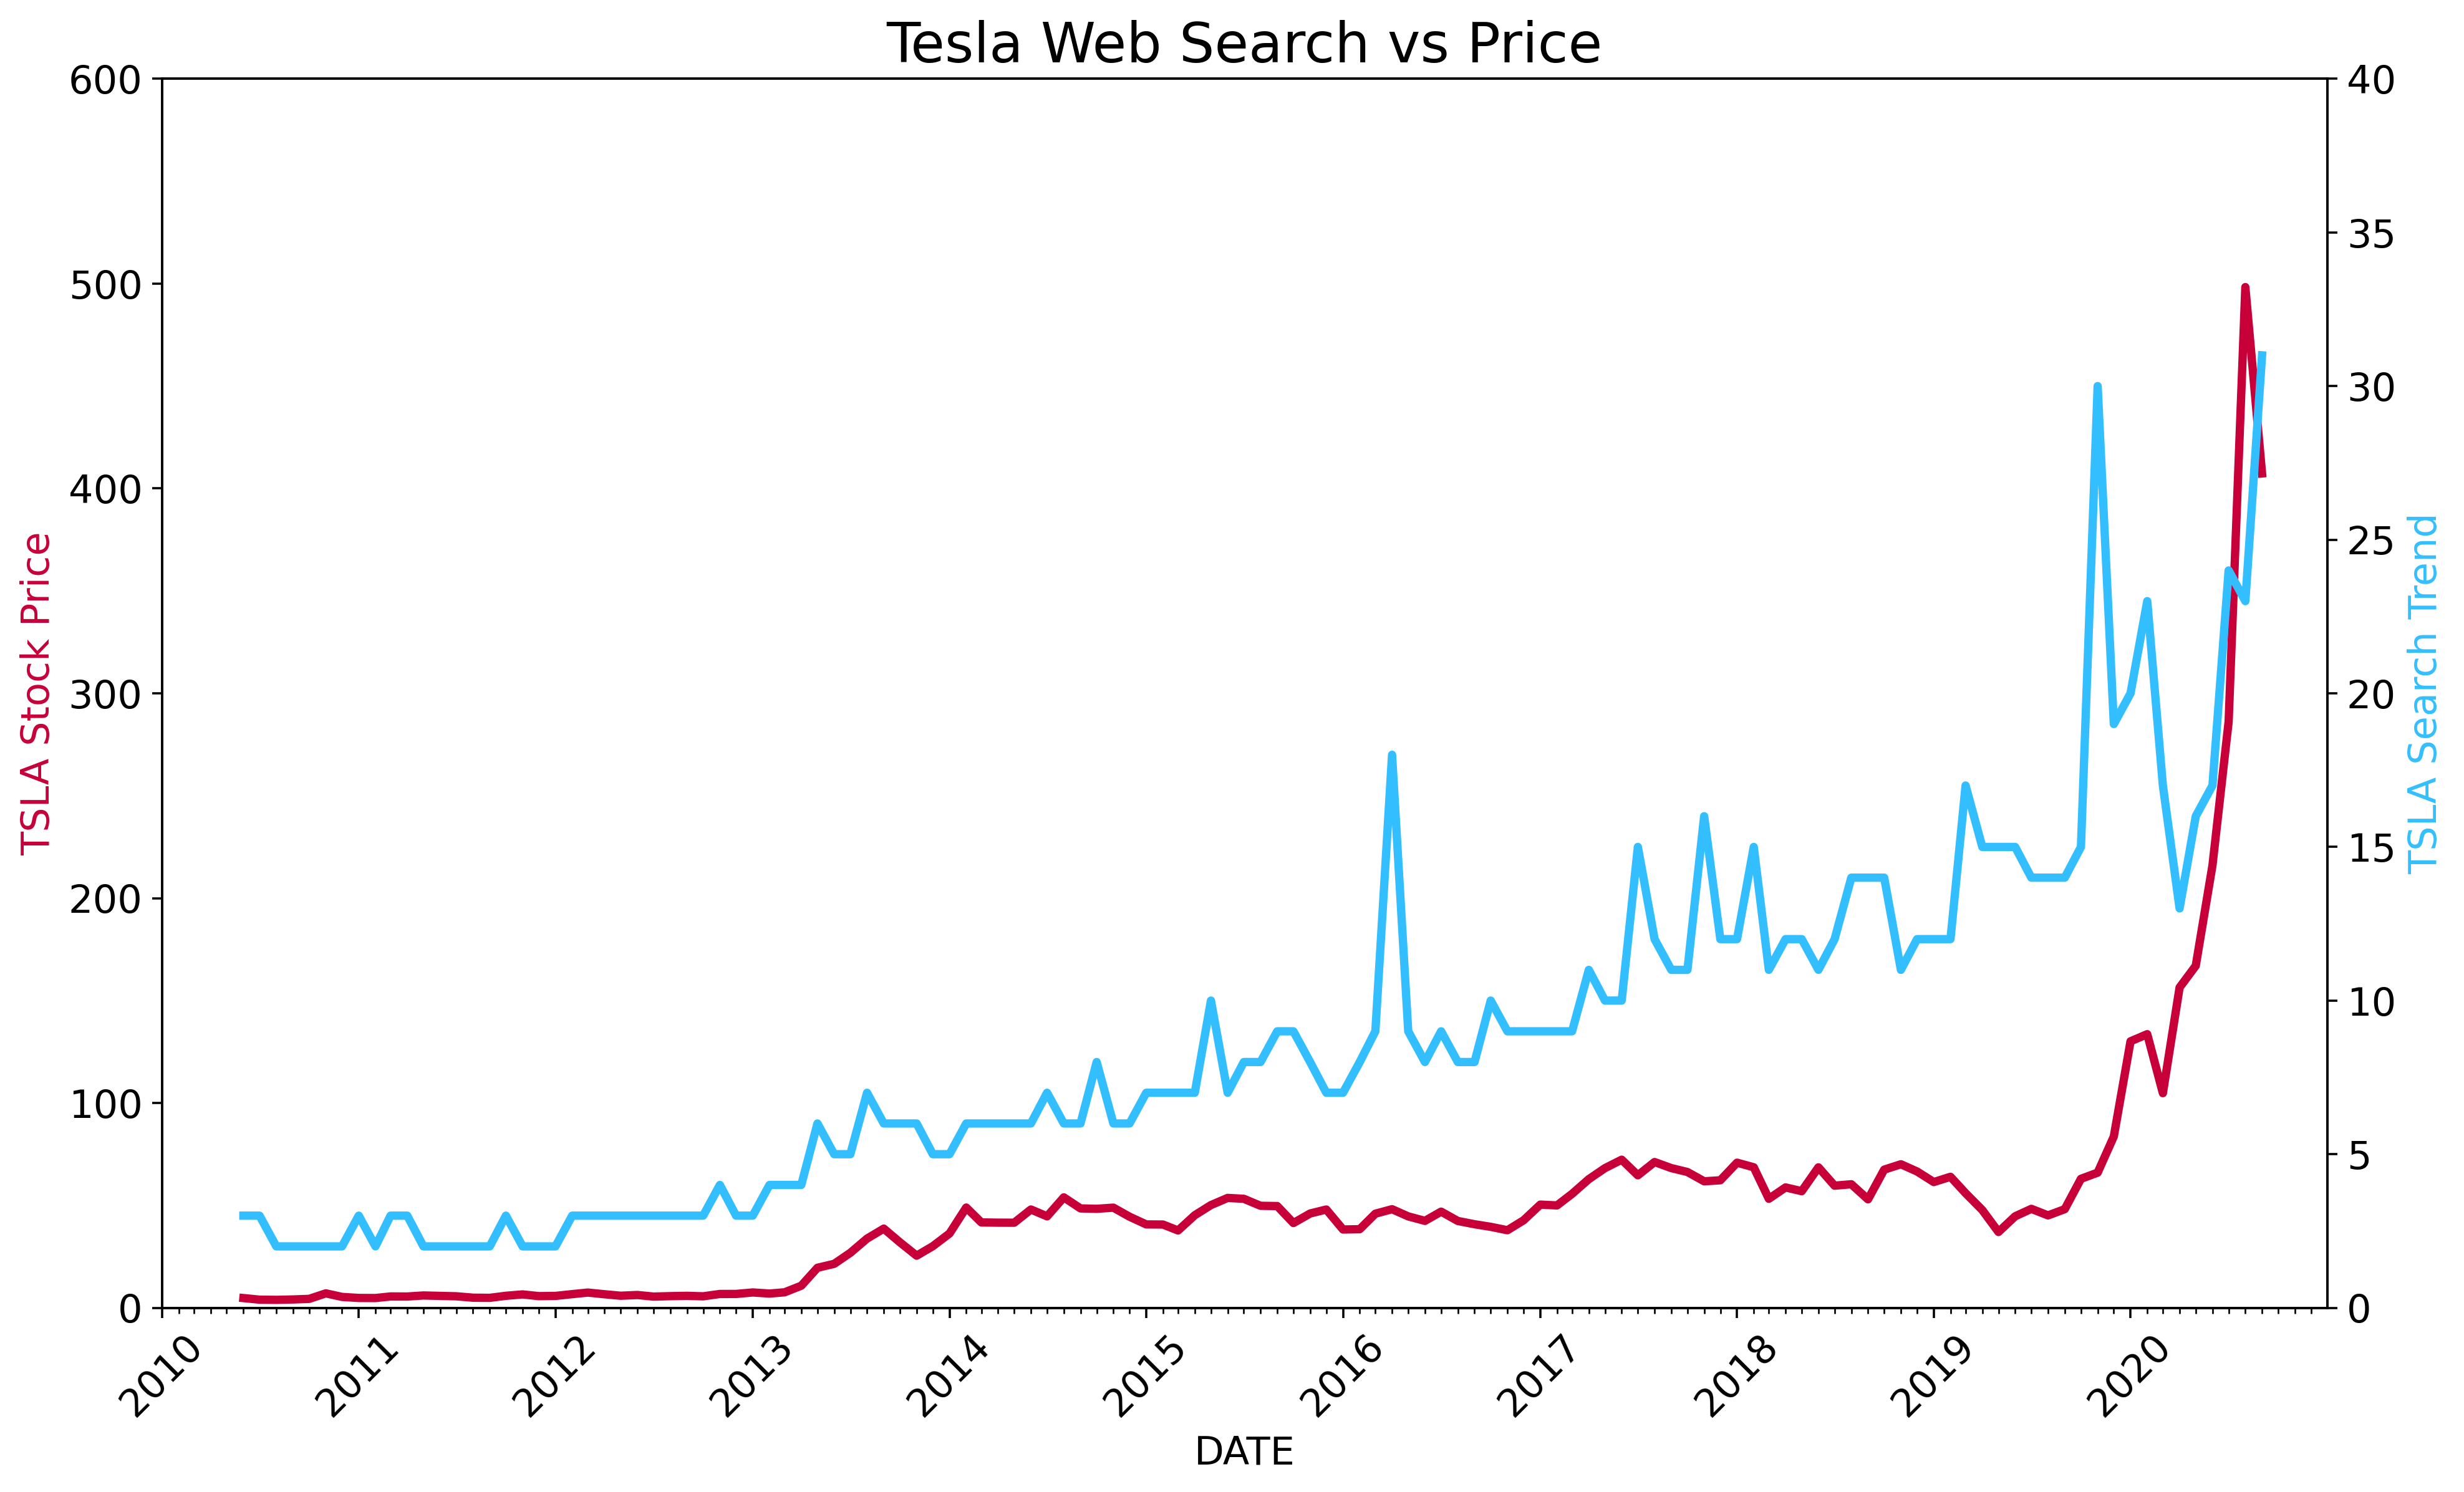

In [536]:
fig, ax1 = plt.subplots(figsize=(14, 8), dpi=320)
ax1.set_title('Tesla Web Search vs Price', size=20)

ax1 = plt.gca()
ax2 = ax1.twinx()

# y-axes design
ax1.set_ylabel('TSLA Stock Price', color='#C70039', size=14)
ax2.set_ylabel('TSLA Search Trend', color='#33BFFF', size=14)

ax1.tick_params(axis='both', labelsize=14)
ax2.tick_params(axis='both', labelsize=14)

ax1.set_ylim(0, 600)
ax2.set_ylim(0, 40)

# x-axes design
ax1.set_xlabel('DATE', size=14)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_xlim(pd.to_datetime('2010-01-01'), pd.to_datetime('2020-12-31'))

# add locator
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# set axes data
x = df_tesla.MONTH
y_TSLA_search = df_tesla.TSLA_WEB_SEARCH
y_TSLA_volume = df_tesla.TSLA_USD_CLOSE

ax1.plot(x, y_TSLA_volume, color='#C70039', linewidth=3)
ax2.plot(x, y_TSLA_search, color='#33BFFF', linewidth=3)
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

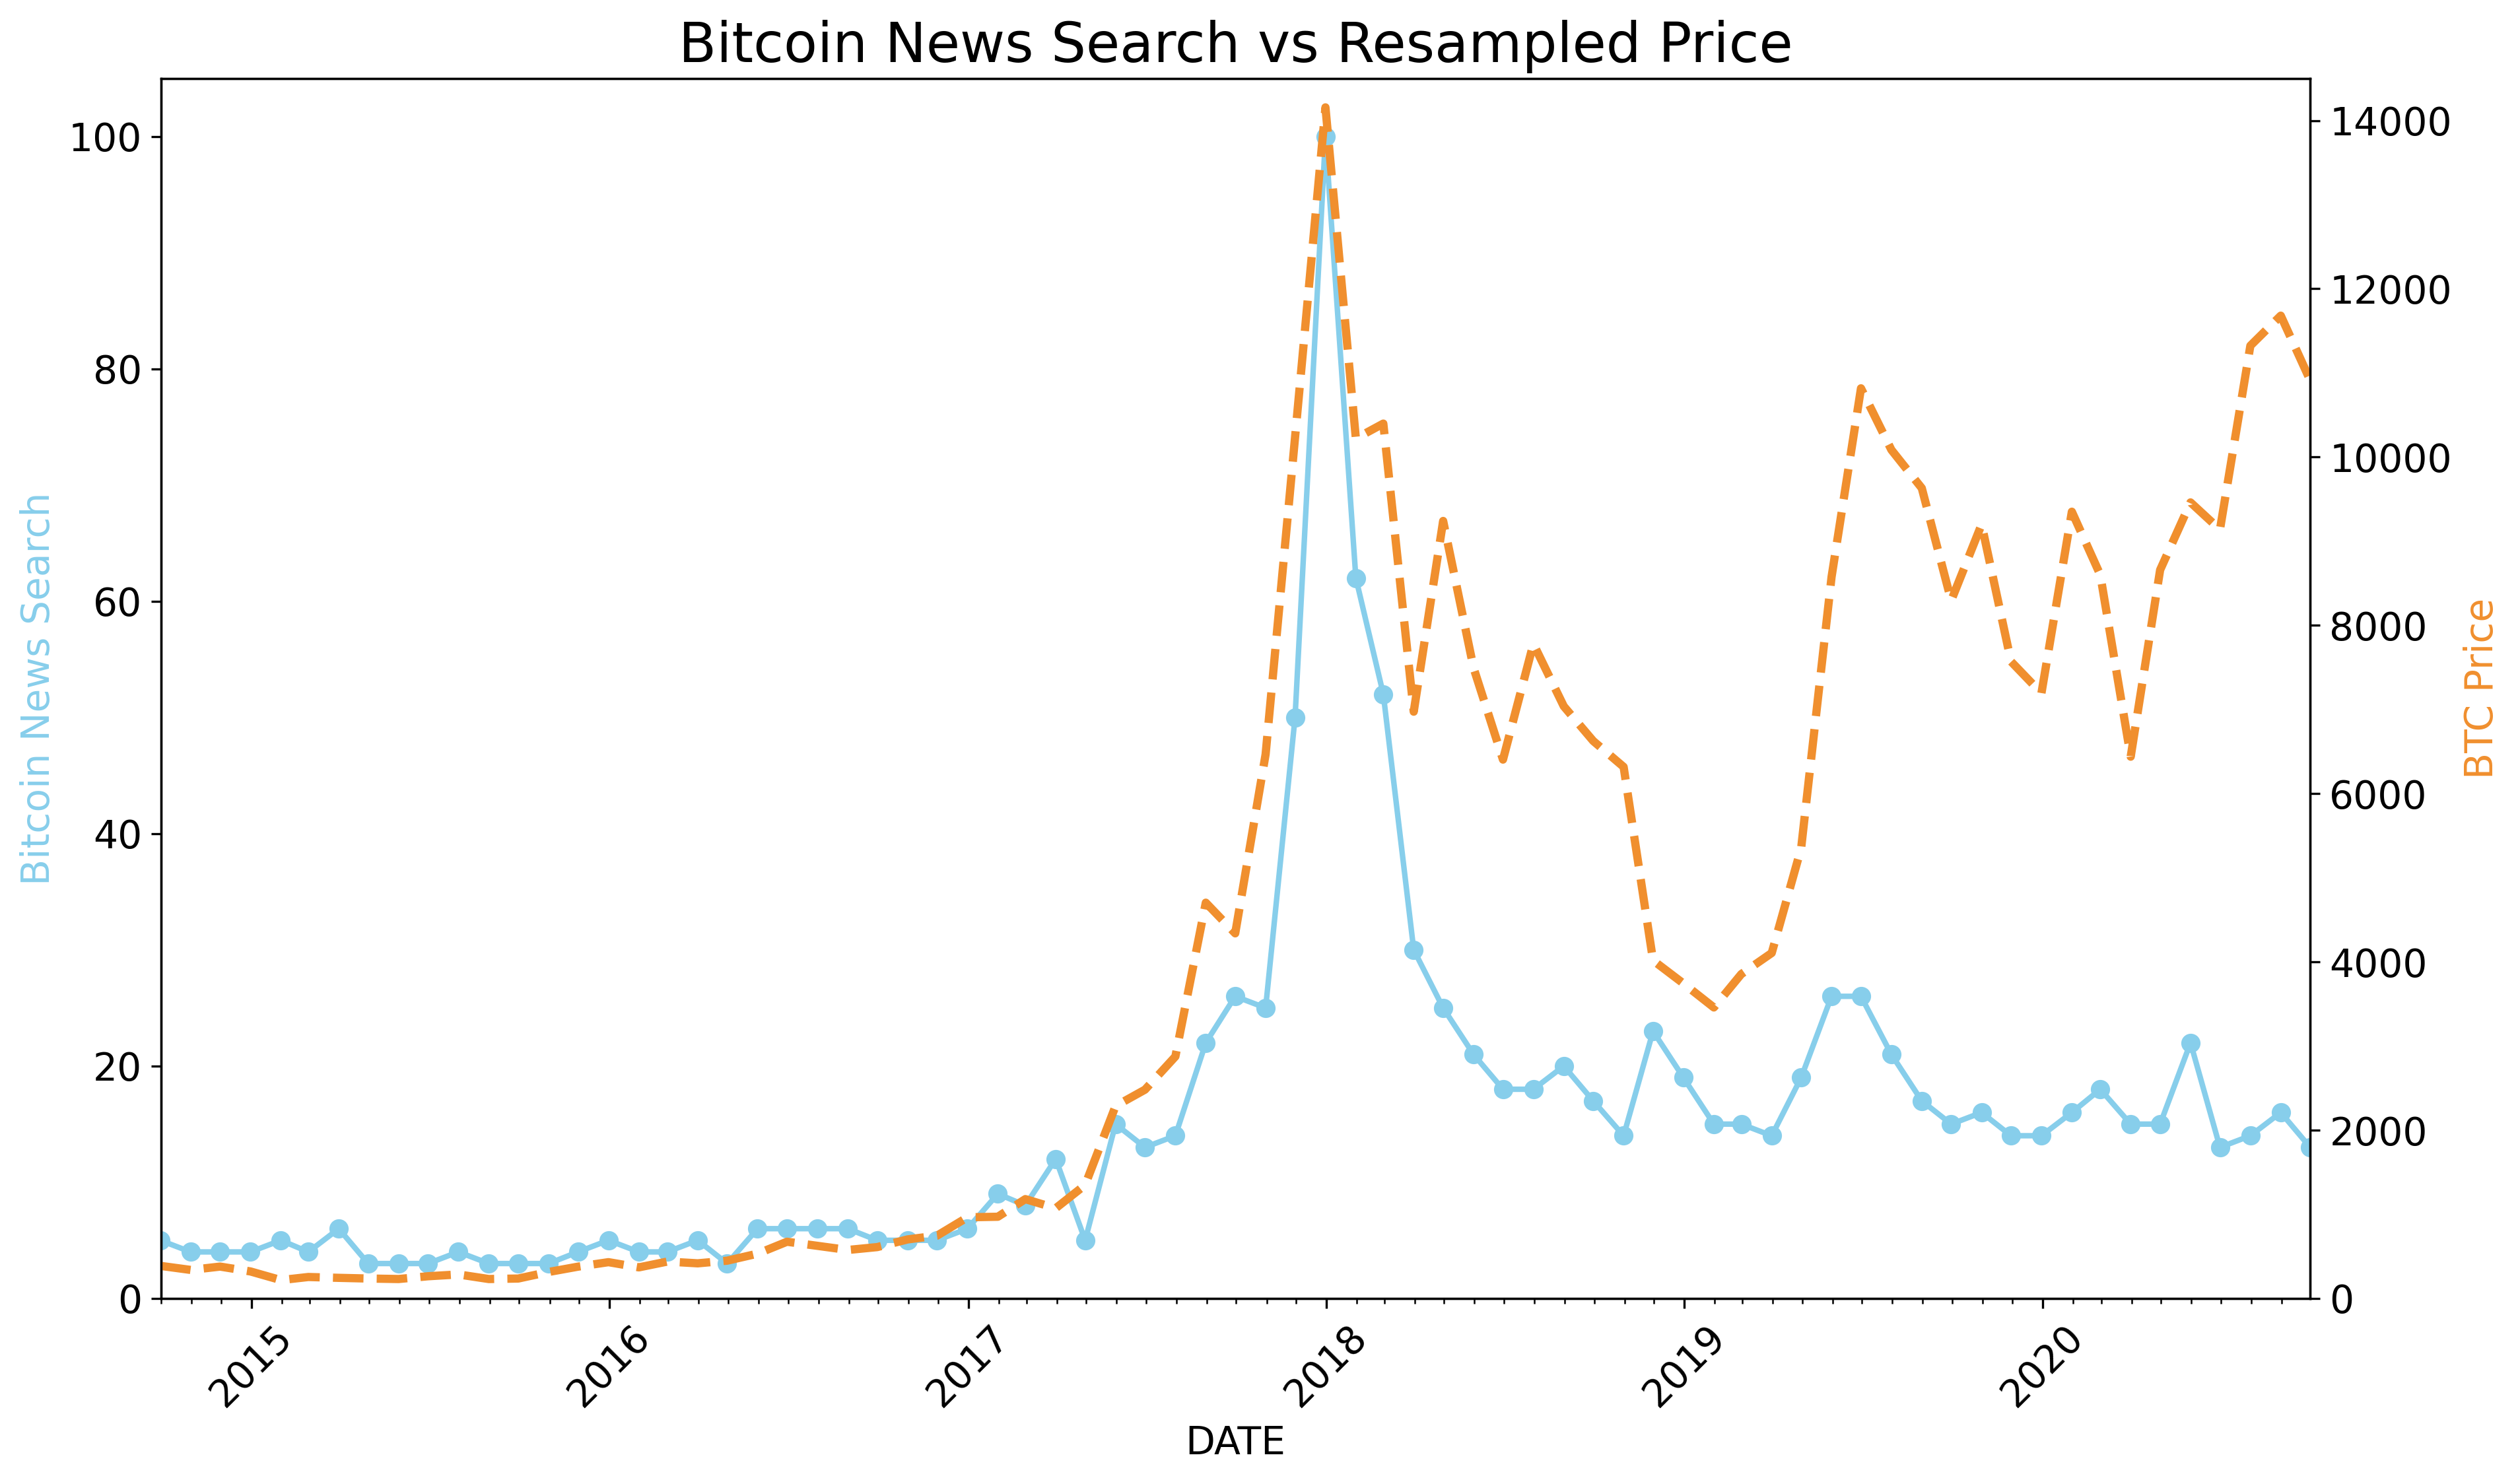

In [537]:
fig, ax1 = plt.subplots(figsize=(14,8), dpi=300)
ax1.set_title('Bitcoin News Search vs Resampled Price', size=20)

ax1 = plt.gca()
ax2 = plt.twinx()

# set labels
ax1.set_xlabel('DATE', size=14)
ax1.set_ylabel('Bitcoin News Search', size=14, color='skyblue')
ax2.set_ylabel('BTC Price', size=14, color='#F08F2E')

# set ticks
ax1.tick_params(axis='x', labelsize=14, labelrotation=45)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

# add locator
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# set axes data
x = df_btc_price.index
y_BTC_search = df_btc_search.BTC_NEWS_SEARCH
y_BTC_price = df_btc_price.CLOSE

# set axes limit
ax1.set_xlim(pd.to_datetime('2014-10-01'), pd.to_datetime('2020-9-30'))
ax1.set_ylim(0, 105)
ax2.set_ylim(0, 14500)

ax1.plot(x, y_BTC_search, color='skyblue', linewidth=2, marker='o')
ax2.plot(x, y_BTC_price, color='#F08F2E', linewidth=3, linestyle='dashed')

plt.show()

In [538]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


In [539]:
df_btc_price.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

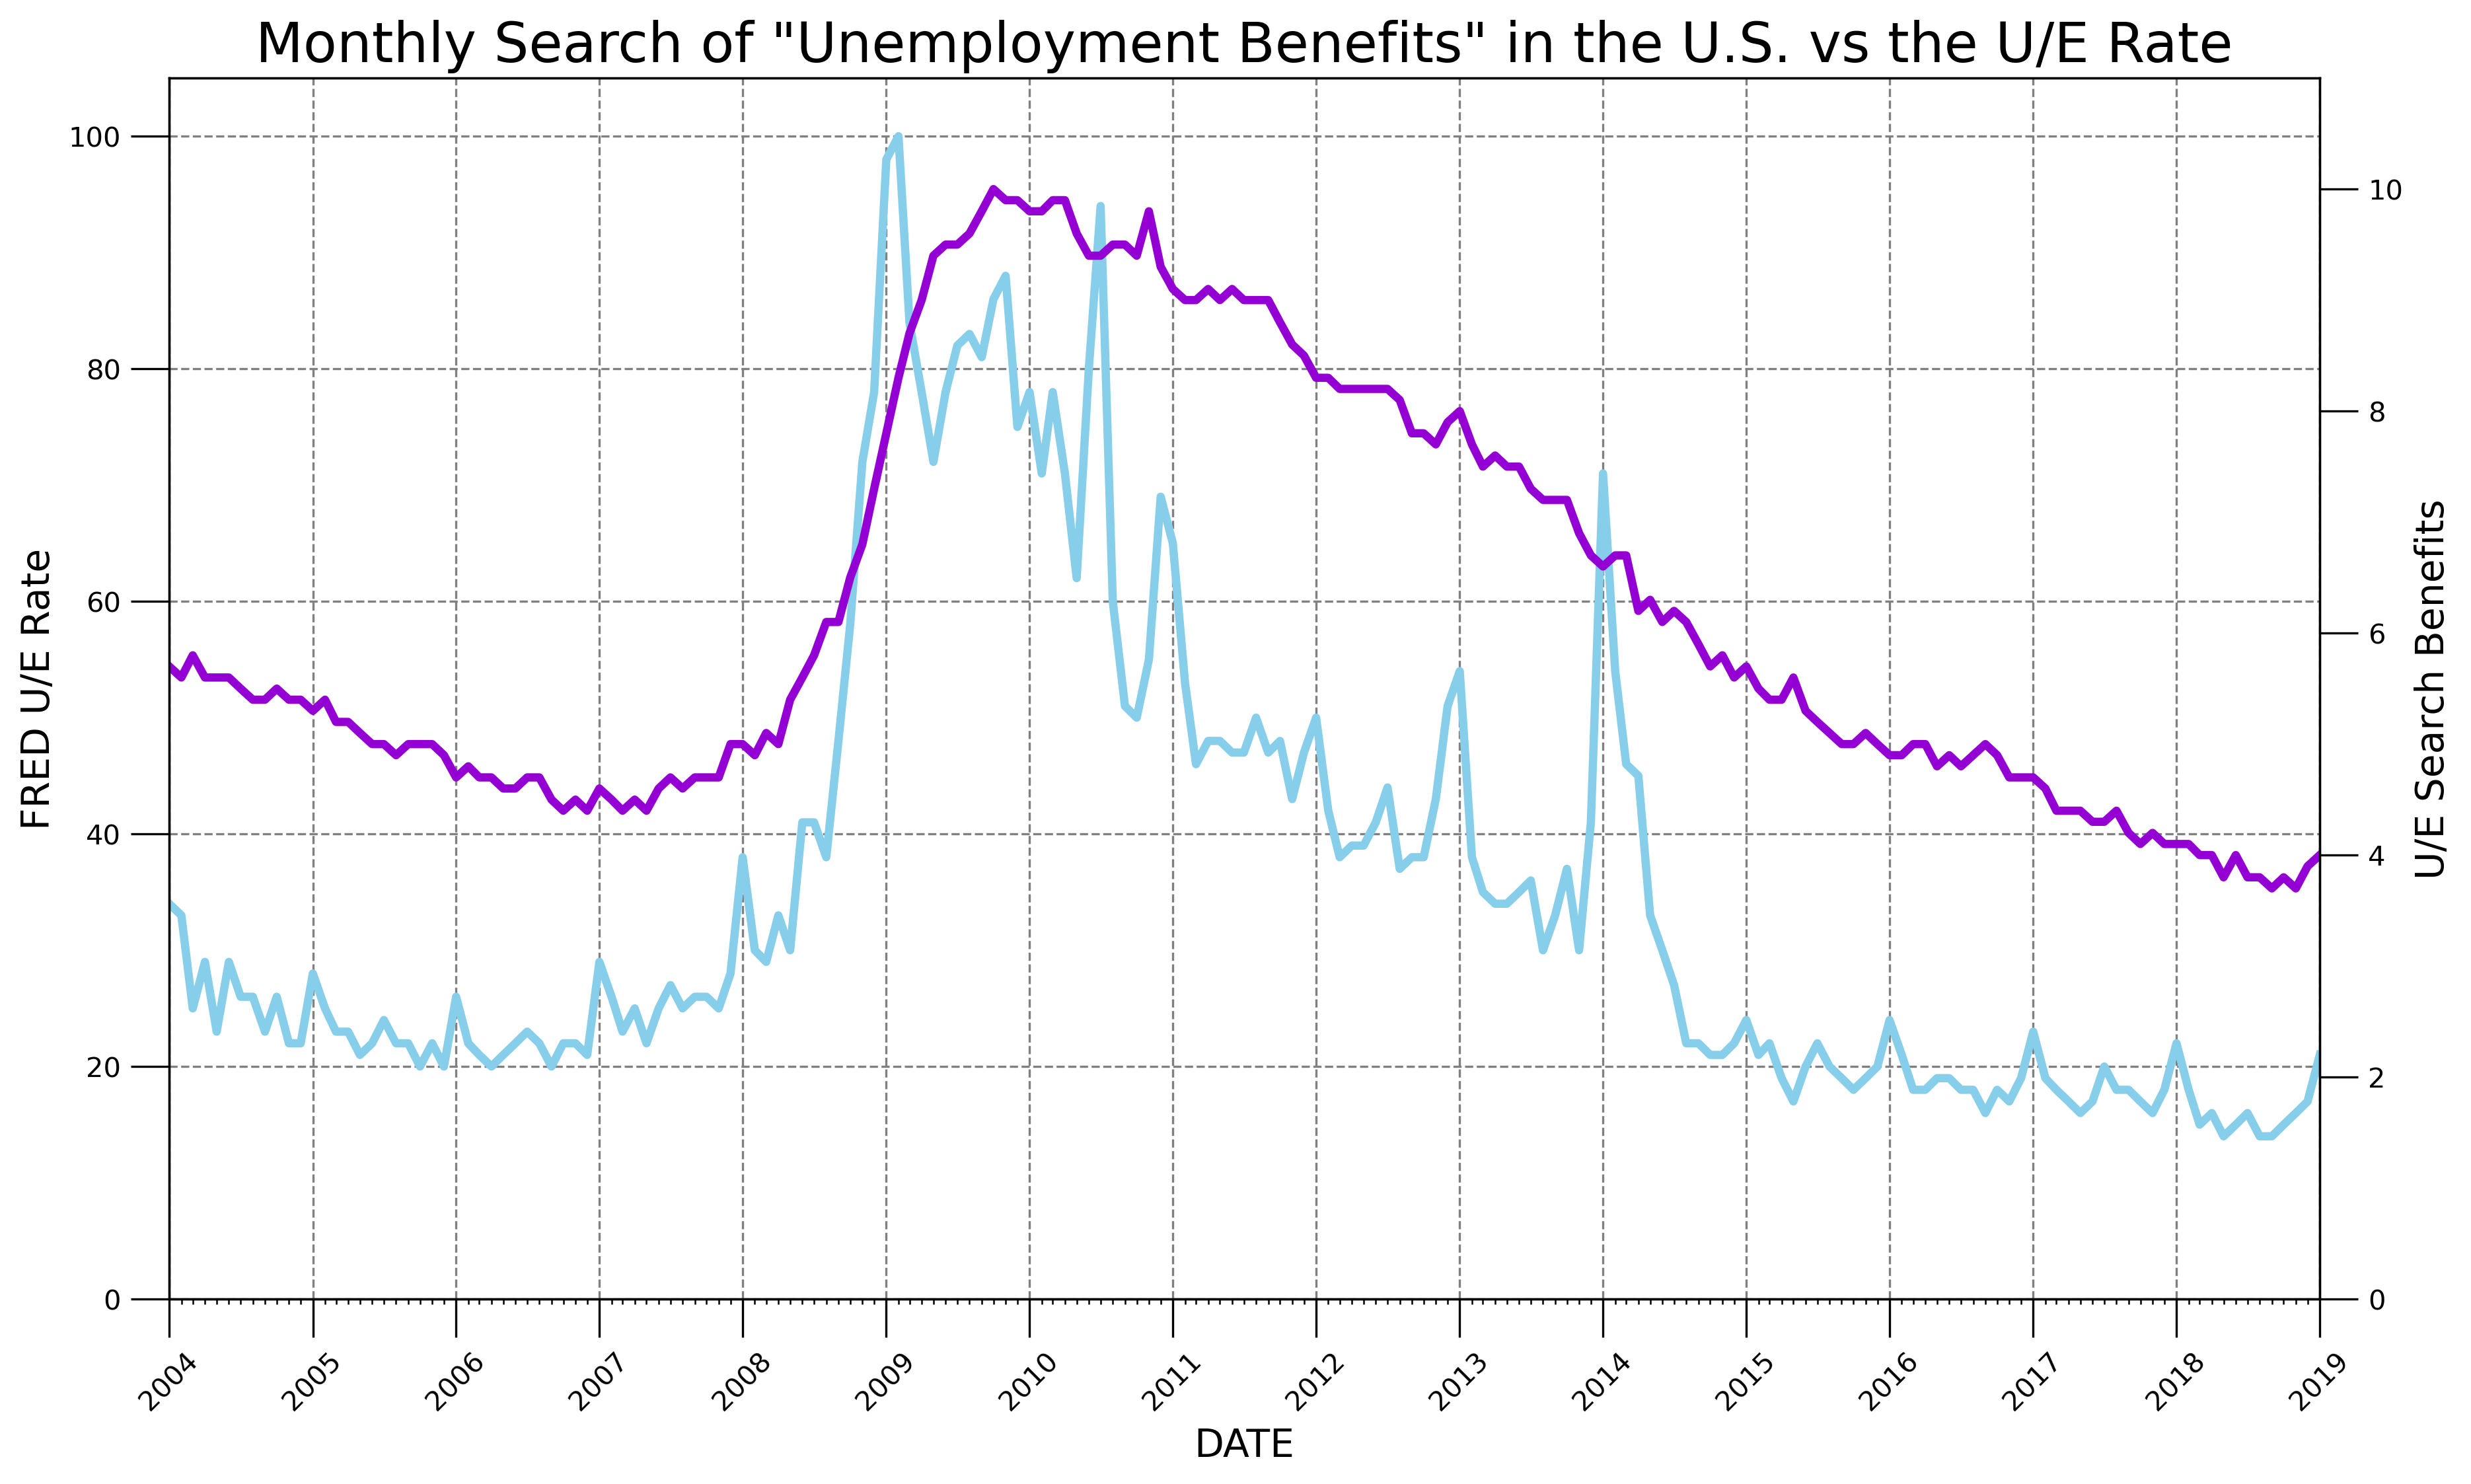

In [540]:
plt.figure(figsize=(14,8), dpi=300)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate',
          size=20)

ax1 = plt.gca()
ax2 = ax1.twinx()

# add grid
ax1.grid(color='grey', linestyle='dashed')

# set labels
ax1.set_xlabel('DATE', size=14)
ax1.set_ylabel('FRED U/E Rate', size=14)
ax2.set_ylabel('U/E Search Benefits', size=14)

# set ticks
ax1.tick_params(axis='x', size=14, rotation=45)
ax1.tick_params(axis='y', size=14)
ax2.tick_params(axis='y', size=14)

# add locator
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# set axes data
x = df_unemployment.MONTH
y_UE_search = df_unemployment.UE_BENEFITS_WEB_SEARCH
y_UE_rate = df_unemployment.UNRATE

# set limit
ax1.set_xlim(pd.to_datetime(df_unemployment.MONTH.min()), 
             pd.to_datetime(df_unemployment.MONTH.max())
            )
ax1.set_ylim(0, 105)
ax2.set_ylim(0, 11)

# plot
ax1.plot(x, y_UE_search, color='skyblue', linewidth=3)
ax2.plot(x, y_UE_rate, color='darkviolet', linewidth=3)

plt.show()

In [541]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [542]:
roll_df=df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

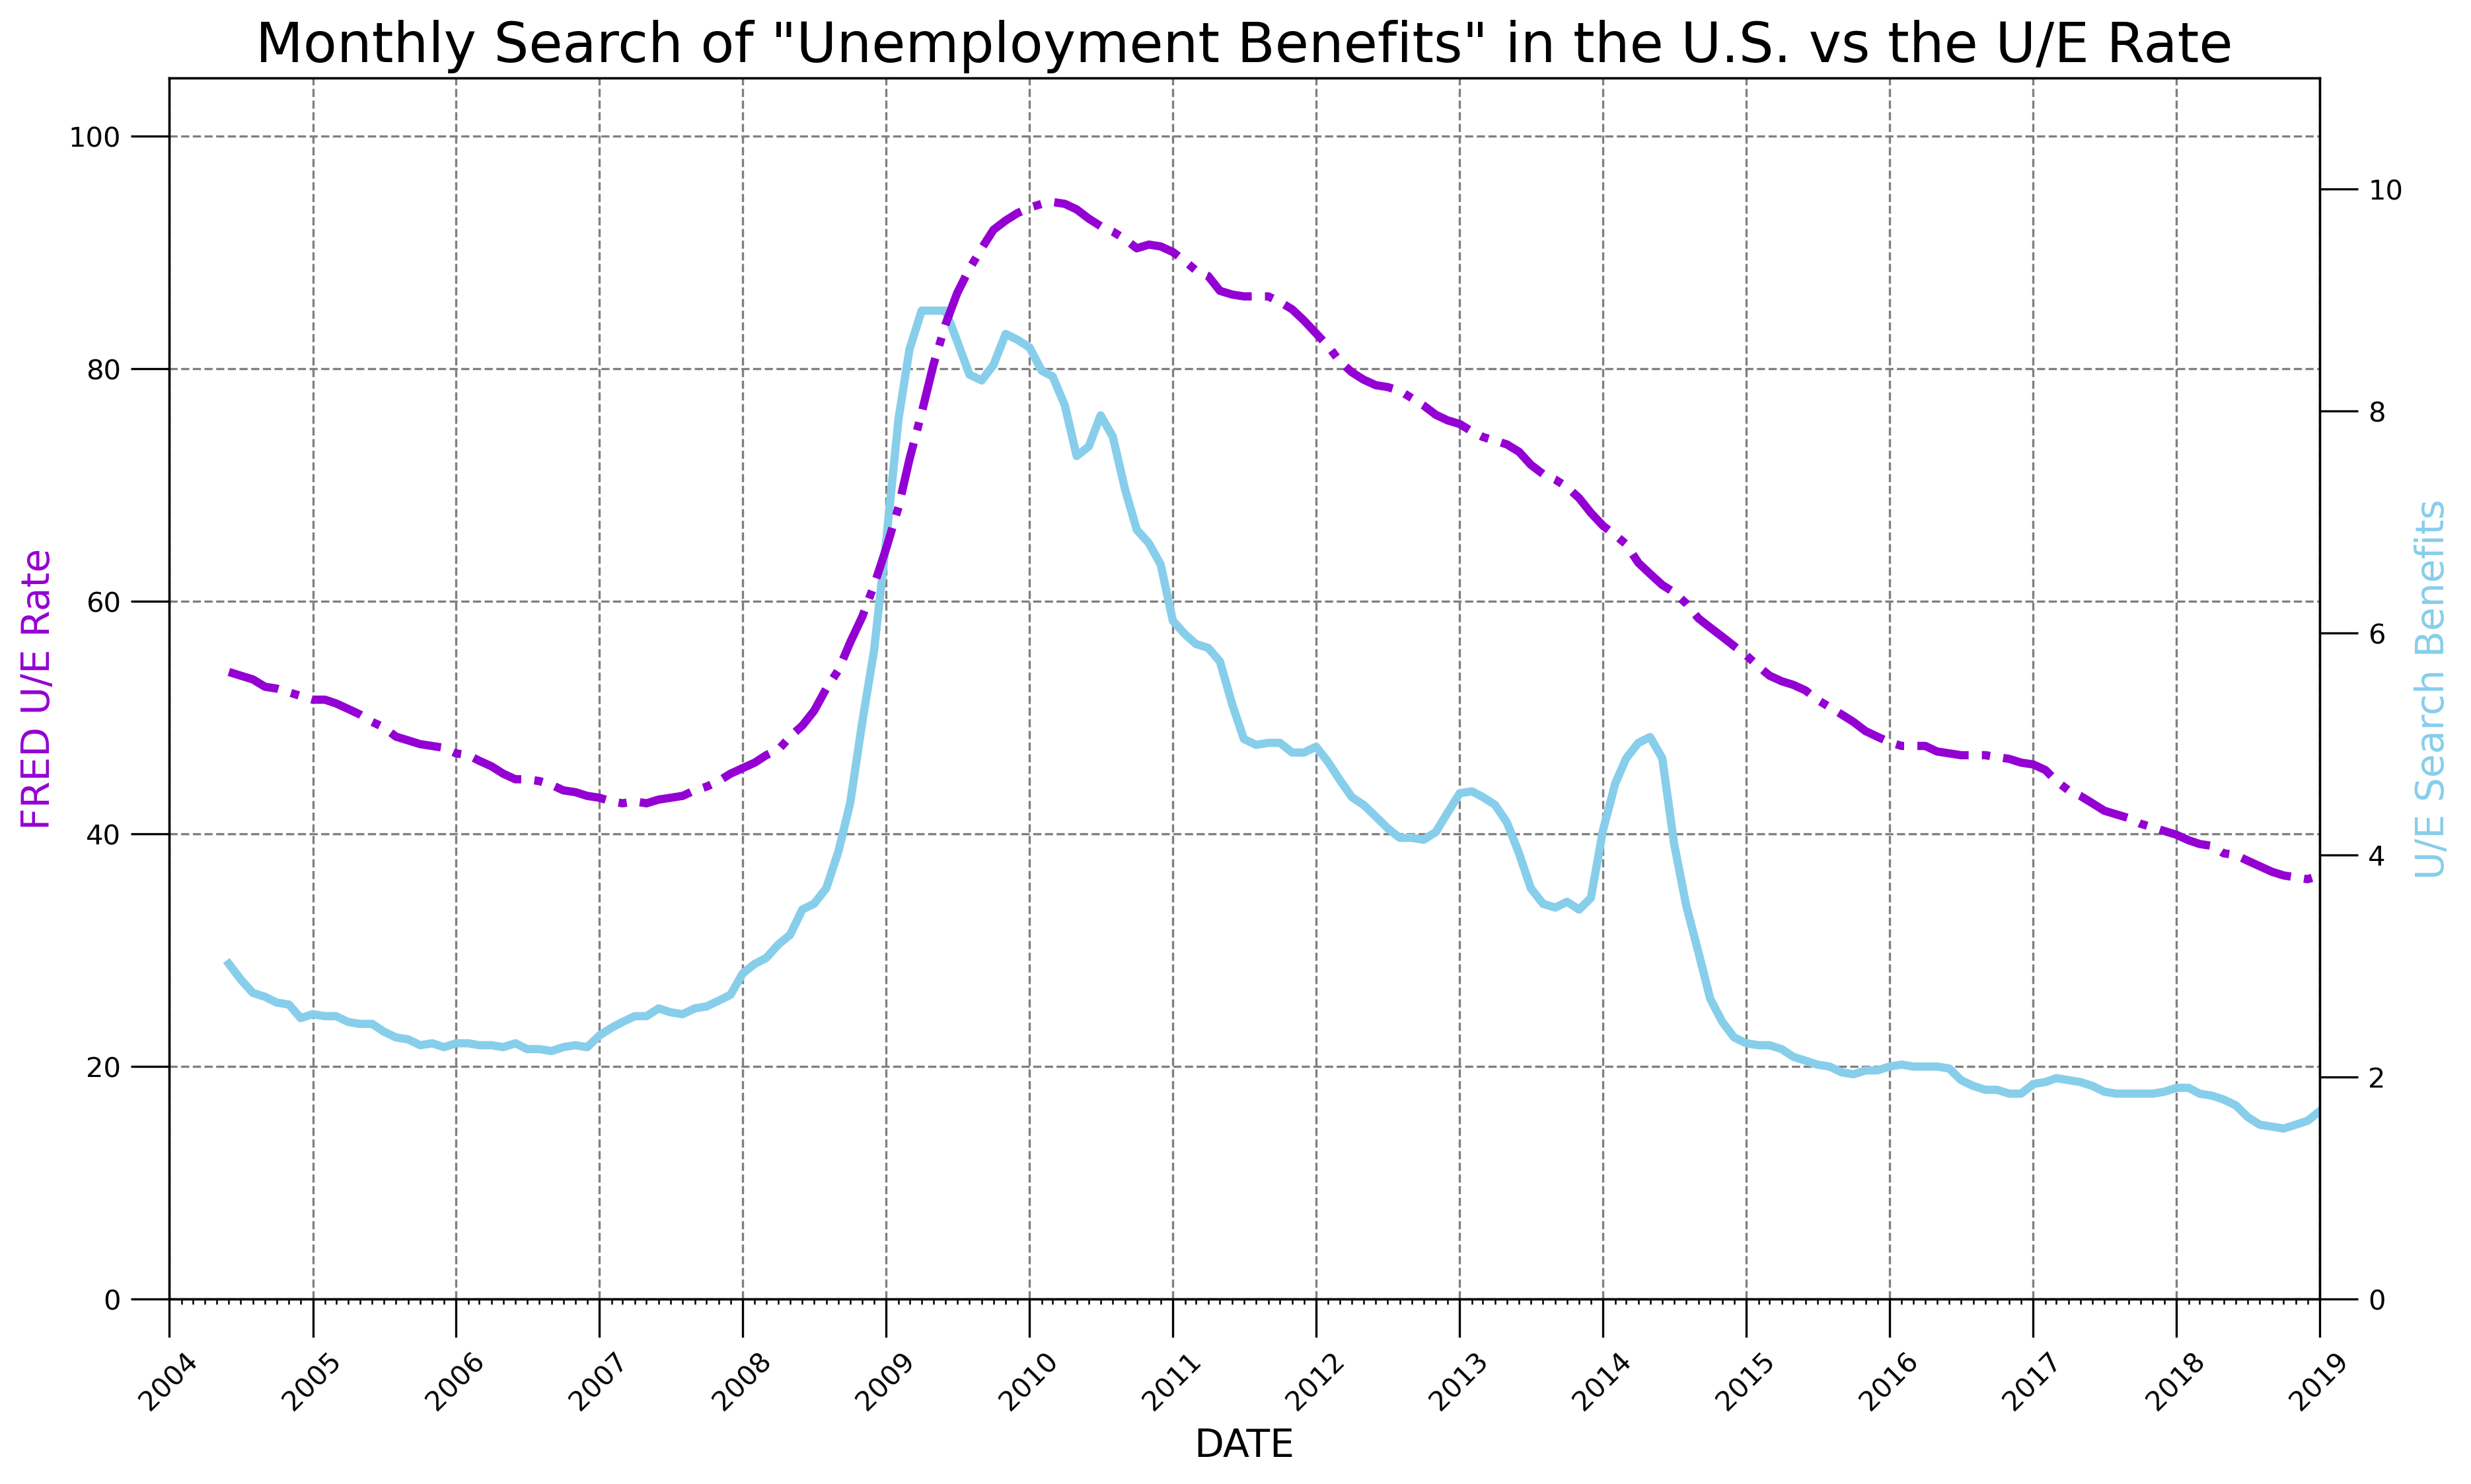

In [543]:
plt.figure(figsize=(14,8), dpi=300)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate',
          size=20)

ax1 = plt.gca()
ax2 = ax1.twinx()

# add grid
ax1.grid(color='grey', linestyle='dashed')

# set labels
ax1.set_xlabel('DATE', size=14)
ax1.set_ylabel('FRED U/E Rate', size=14, color='darkviolet')
ax2.set_ylabel('U/E Search Benefits', size=14, color='skyblue')

# set ticks
ax1.tick_params(axis='x', size=14, rotation=45)
ax1.tick_params(axis='y', size=14)
ax2.tick_params(axis='y', size=14)

# add locator
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# set axes data
x = df_unemployment.MONTH
y_UE_search = roll_df.UE_BENEFITS_WEB_SEARCH
y_UE_rate = roll_df.UNRATE

# set limit
ax1.set_xlim(pd.to_datetime(df_unemployment.MONTH.min()), 
             pd.to_datetime(df_unemployment.MONTH.max())
            )
ax1.set_ylim(0, 105)
ax2.set_ylim(0, 11)

# plot
ax1.plot(x, y_UE_search, color='skyblue', linewidth=3)
ax2.plot(x, y_UE_rate, color='darkviolet', linewidth=3, linestyle='-.')

plt.show()

In [544]:
roll_df.tail()

,UE_BENEFITS_WEB_SEARCH,UNRATE
176,14.833333,3.850000
177,14.666667,3.816667
178,15.000000,3.800000
179,15.333333,3.783333
180,16.166667,3.816667


### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [545]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv', encoding='utf8')
df_ue_2020.tail()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
195,2020-04,100,14.7
196,2020-05,63,13.3
197,2020-06,53,11.1
198,2020-07,54,10.2
199,2020-08,50,8.4


In [546]:
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)
df_ue_2020.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6


In [547]:
df_ue_2020.tail()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
195,2020-04-01,100,14.7
196,2020-05-01,63,13.3
197,2020-06-01,53,11.1
198,2020-07-01,54,10.2
199,2020-08-01,50,8.4


In [548]:
missing_value = df_ue_2020.isna().values.any()
print(missing_value)

False


In [549]:
df_ue_2020.dropna(inplace=True)
df_ue_2020.tail()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
195,2020-04-01,100,14.7
196,2020-05-01,63,13.3
197,2020-06-01,53,11.1
198,2020-07-01,54,10.2
199,2020-08-01,50,8.4


In [550]:
type(df_ue_2020.MONTH[0]).__name__

'Timestamp'

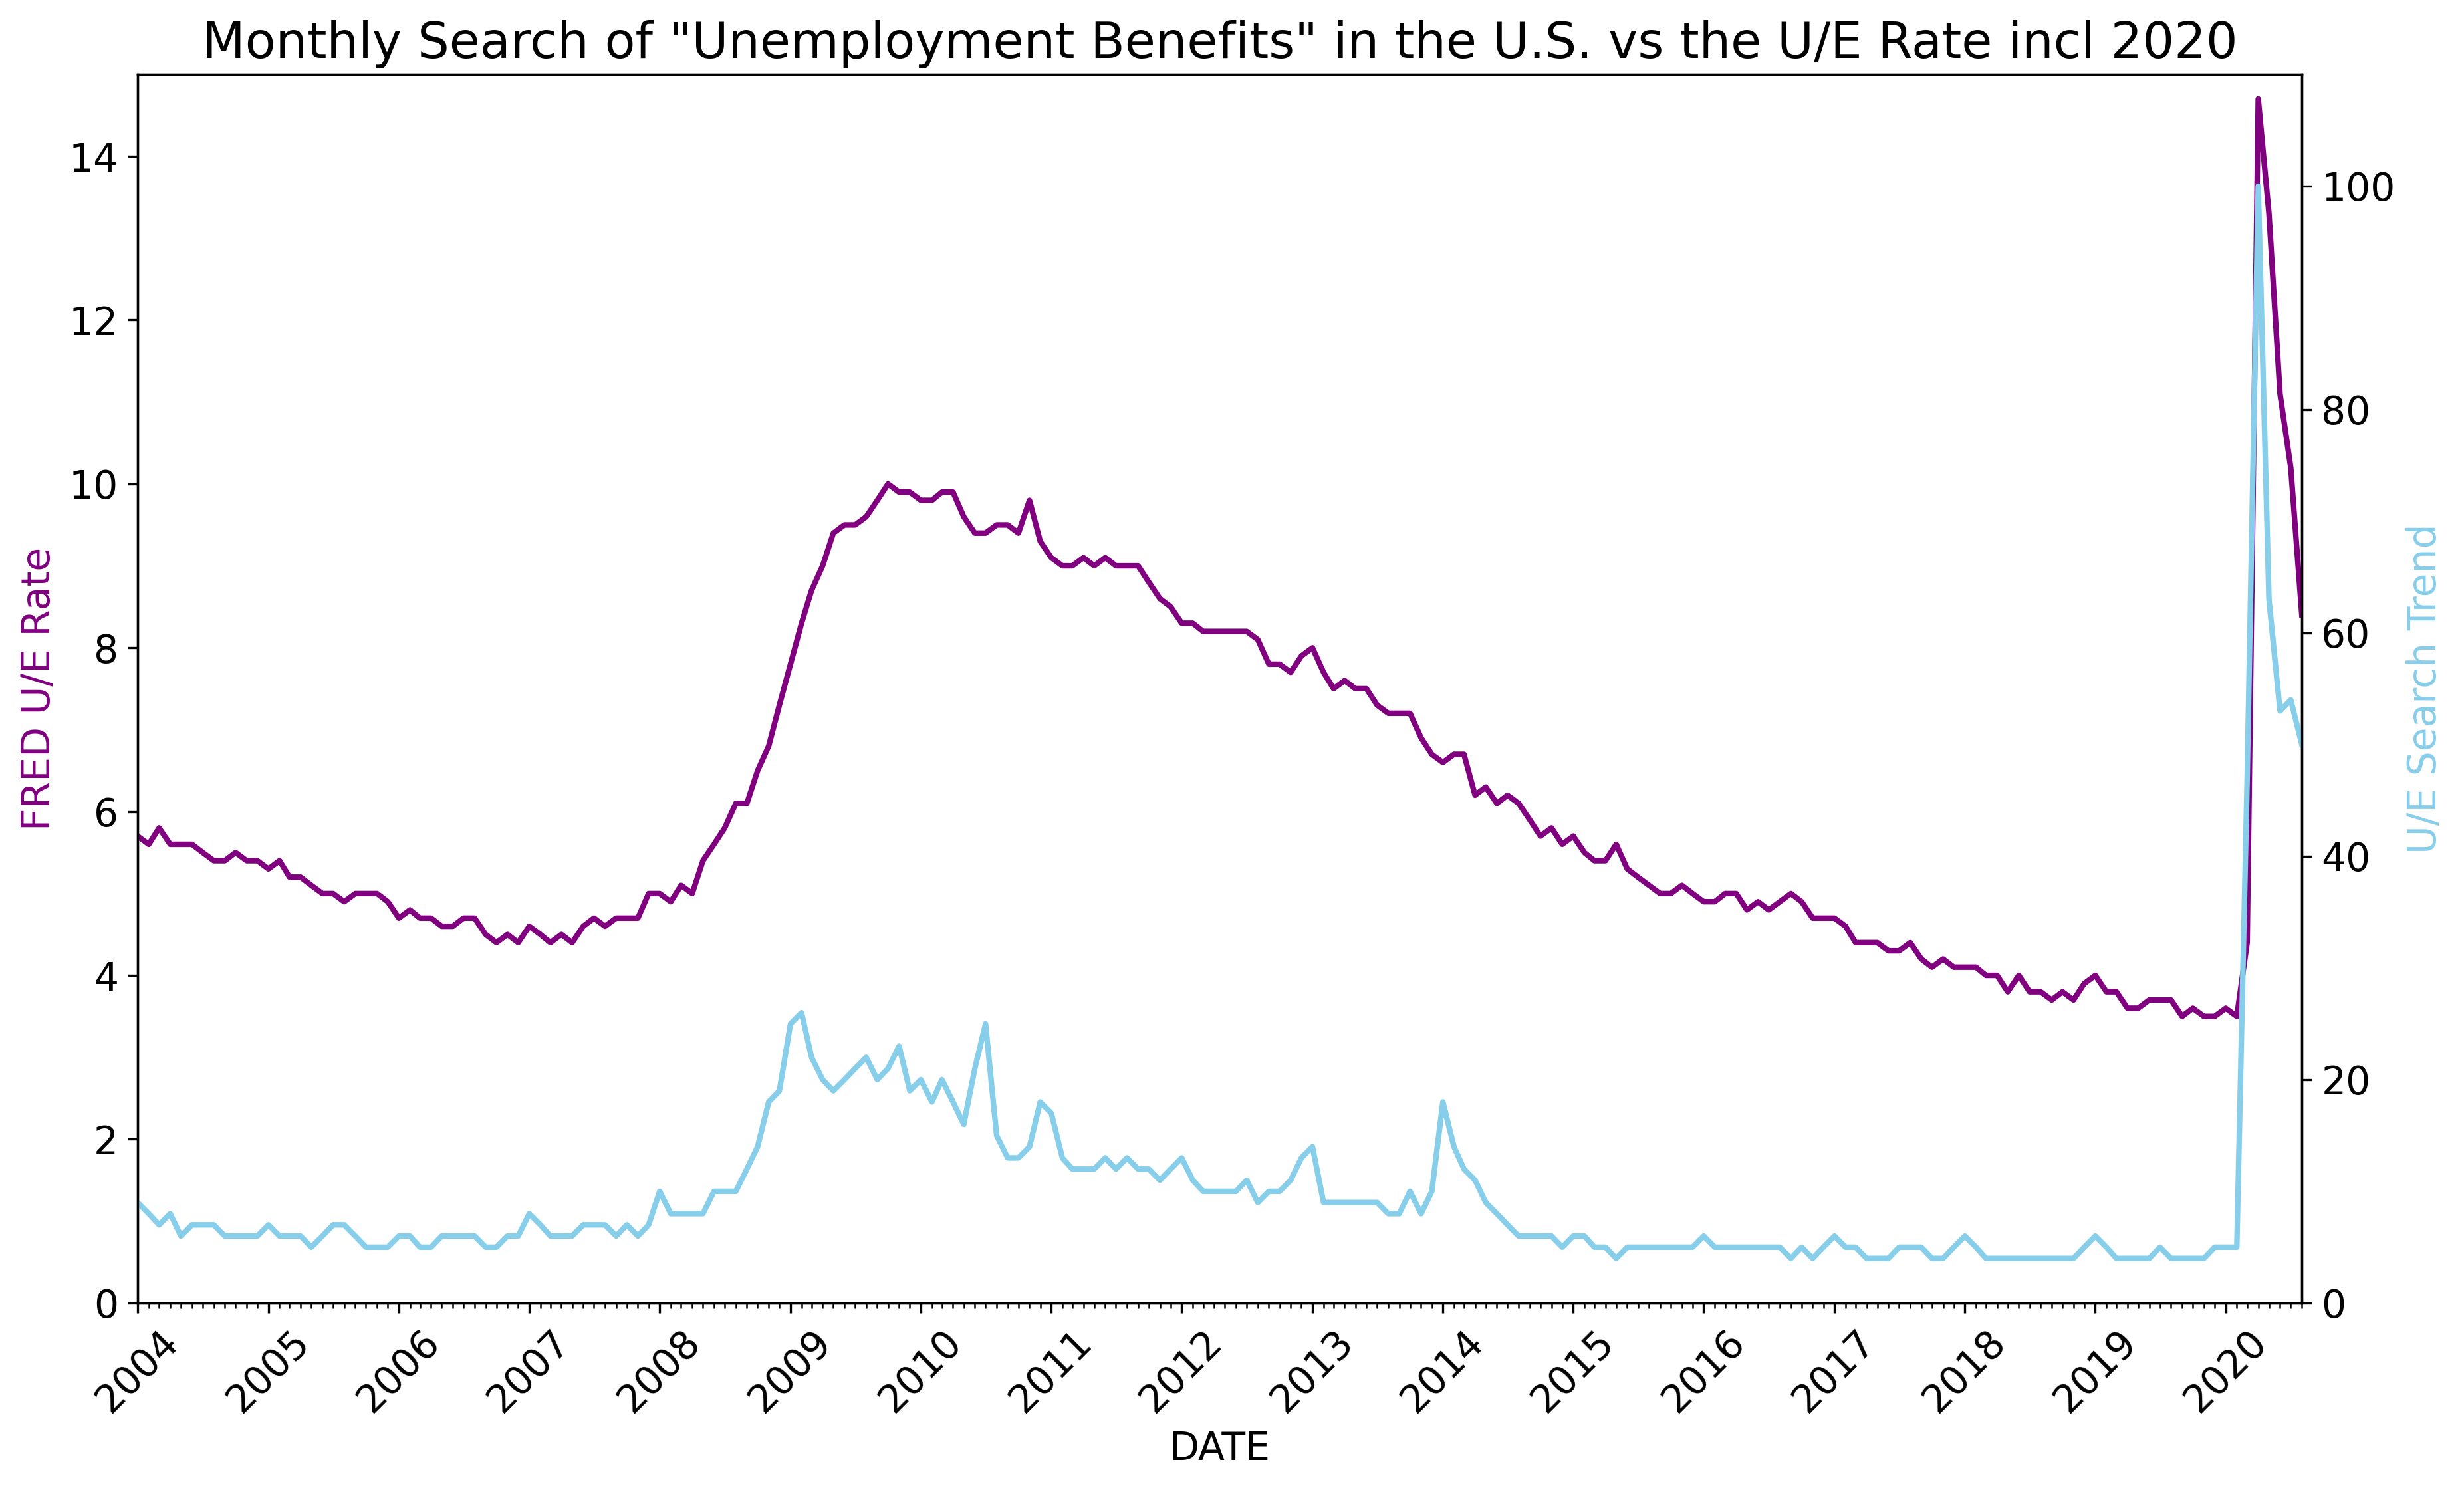

In [559]:
plt.figure(figsize=(14,8), dpi=300)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate incl 2020',
          size=18)

ax1=plt.gca()
ax2=ax1.twinx()

# set labels
ax1.set_xlabel('DATE', size=14)
ax1.set_ylabel('FRED U/E Rate', size=14, color='purple')
ax2.set_ylabel('U/E Search Trend', size=14, color='skyblue')

# set ticks
ax1.tick_params(axis='x', labelsize=14, rotation=45)
ax1.tick_params(axis='y', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)

# set axes
x = df_ue_2020.MONTH
y_UE_rate_2020 = df_ue_2020.UNRATE
y_UE_search_2020 = df_ue_2020.UE_BENEFITS_WEB_SEARCH

# add locator
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# set limits
ax1.set_xlim(df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max())
ax1.set_ylim(0, 15)
ax2.set_ylim(0, 110)

# plot
ax1.plot(x, y_UE_rate_2020, color='purple', linewidth=2)
ax2.plot(x, y_UE_search_2020, color='skyblue', linewidth=2)